In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.formula.api as smf

In [3]:
newdata = pd.read_excel("/Users/amitmishra/Downloads/lfcsquadstatsnew.xlsx")

In [4]:
model = smf.ols("Min~Age", data = newdata).fit()

In [5]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Min   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     6.715
Date:                Fri, 10 Feb 2023   Prob (F-statistic):             0.0157
Time:                        17:57:19   Log-Likelihood:                -205.07
No. Observations:                  27   AIC:                             414.1
Df Residuals:                      25   BIC:                             416.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -581.2025    515.864     -1.127      0.271   -1643.645     481.240
Age           50.5106     19.493      2.591      0.016      10.365      90.657
==============================================================================
Omnibus:                        3.566   Durbin-Watson:                   0.404
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                2.022
Skew:                           0.420   Prob(JB):                        0.364
Kurtosis:                       1.955   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

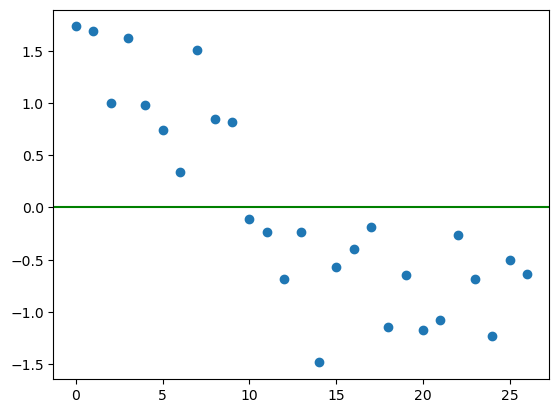

In [6]:
plt.plot(model.resid_pearson, "o")
plt.axhline(y=0, c = "green")

In [7]:
model_cd = model.get_influence()
(model_cd,areg) = model_cd.cooks_distance
max_dist = np.max(model_cd)
max_distarg = np.argmax(model_cd)
print("The max Cook's distance is: {} and the index is: {}".format(max_dist,max_distarg))

The max Cook's distance is: 0.40044355133438825 and the index is: 14


In [ ]:
#newdata_update = newdata.drop(0)

In [ ]:
#newdata_update.iloc[0]

In [9]:
model1 = smf.ols("Min~Age+Totdist",data = newdata).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Min   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     51.12
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           2.23e-09
Time:                        19:06:23   Log-Likelihood:                -185.87
No. Observations:                  27   AIC:                             377.7
Df Residuals:                      24   BIC:                             381.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -119.3283    263.977     -0.452      0.655    -664.151     425.494
Age            8.1906     10.917      0.750      0.460     -14.341      30.722
Totdist        0.3966      0.046      8.689      0.000       0.302       0.491
==============================================================================
Omnibus:                        8.656   Durbin-Watson:                   1.319
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                6.802
Skew:                           1.017   Prob(JB):                       0.0333
Kurtosis:                       4.382   Cond. No.                     1.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
model2 = smf.ols("Min~Totdist", data = newdata).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Min   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     103.5
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           2.27e-10
Time:                        19:06:31   Log-Likelihood:                -186.18
No. Observations:                  27   AIC:                             376.4
Df Residuals:                      25   BIC:                             379.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.0357     80.834      0.854      0.401     -97.445     235.517
Totdist        0.4118      0.040     10.172      0.000       0.328       0.495
==============================================================================
Omnibus:                        9.944   Durbin-Watson:                   1.212
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                8.341
Skew:                           1.103   Prob(JB):                       0.0154
Kurtosis:                       4.597   Cond. No.                     3.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
model2_cd = model2.get_influence()
(model2_cd,areg) = model2_cd.cooks_distance
max_dist = np.max(model2_cd)
maxdistarg = np.argmax(model2_cd)
print("The Cook's distance is: {} and the index is: {}".format(max_dist,maxdistarg))

#Calculating Cook's distance for model 2 (y = Min, and x = Totdist)

The Cook's distance is: 0.2656872968865735 and the index is: 0


<StemContainer object of 3 artists>

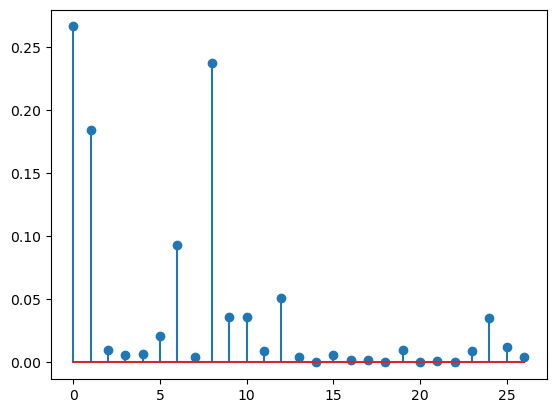

In [21]:
plt.stem(np.arange(len(newdata)),np.round(model2_cd,3))

In [ ]:
plt.plot(model2.resid_pearson, "o")
plt.axhline(y=0, c = "green")

In [27]:
newdata1 = newdata.drop(0)
newdata1

,Player,Age,MP,Min,Totdist,PrgDist
1,Mohamed Salah,30,20,1776,3051,1374
2,Virgil van Dijk,31,17,1485,3632,1865
3,Trent Alexander-Arnold,24,20,1441,3137,1636
4,Andrew Robertson,28,18,1322,3236,1790
5,Fabinho,29,18,1253,2366,989
6,Thiago Alcántara,31,14,1154,3315,1541
7,Harvey Elliott,19,20,1131,2757,1379
8,Joe Gomez,25,17,1106,3507,2004
9,Darwin Núñez,23,15,989,1433,792
10,Roberto Firmino,31,13,929,1303,526


In [30]:
model2a = smf.ols("Min~Totdist", data = newdata1).fit()
model2a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Min   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     141.7
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           1.47e-11
Time:                        19:27:02   Log-Likelihood:                -173.83
No. Observations:                  26   AIC:                             351.7
Df Residuals:                      24   BIC:                             354.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     67.4068     65.647      1.027      0.315     -68.082     202.896
Totdist        0.3950      0.033     11.904      0.000       0.327       0.464
==============================================================================
Omnibus:                        3.996   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                2.449
Skew:                           0.709   Prob(JB):                        0.294
Kurtosis:                       3.499   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Note: The rsquared of the new model after one influential point increases, while the AIC and BIC scores decrease.
#So the model might be more accurate.

In [47]:
model2a_cd = model2a.get_influence()
(model2a_cd,areg) = model2a_cd.cooks_distance
maxdist = np.max(model2a_cd)
maxdist_arg = np.argmax(model2a_cd)
print("The max cook's distance is: {} and the index is: {}".format(maxdist,maxdist_arg))

The max cook's distance is: 0.370775194544049 and the index is: 0


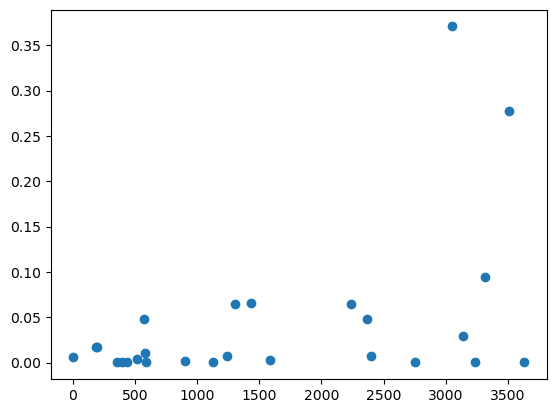

In [44]:
plt.scatter(newdata1.Totdist,model2a_cd)

#A scatter to find demonstrate the cooks distance and high influential points

In [51]:
newdata2 = newdata1.drop(1)
#plt.stem(np.arange(len(newdata1)),np.round(model2a_cd,3))

In [55]:
model2b = smf.ols("Min~Totdist", data = newdata2).fit()
model2b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Min   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     159.4
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           7.98e-12
Time:                        19:51:55   Log-Likelihood:                -163.41
No. Observations:                  25   AIC:                             330.8
Df Residuals:                      23   BIC:                             333.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.0222     56.790      1.427      0.167     -36.458     198.502
Totdist        0.3728      0.030     12.624      0.000       0.312       0.434
==============================================================================
Omnibus:                        2.465   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.292   Jarque-Bera (JB):                1.473
Skew:                           0.590   Prob(JB):                        0.479
Kurtosis:                       3.151   Cond. No.                     3.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
model2b_cd = model2b.get_influence()
(model2b_cd,areg) = model2b_cd.cooks_distance
maxdist = np.max(model2b_cd)
maxdist_arg = np.argmax(model2b_cd)
print("The max cook's distance is: {} and the index is: {}".format(maxdist,maxdist_arg))

The max cook's distance is: 0.28316249120782216 and the index is: 6


<StemContainer object of 3 artists>

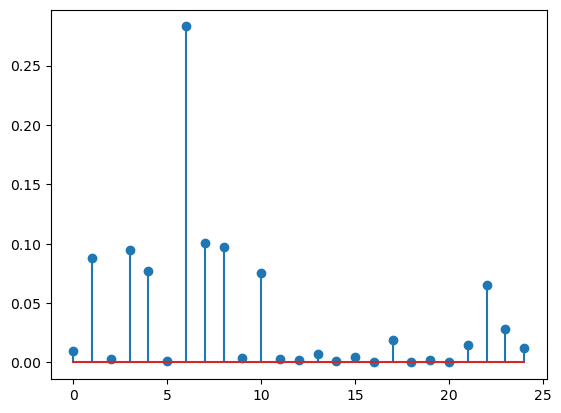

In [58]:
plt.stem(np.arange(len(newdata2)),np.round(model2b_cd,3))

In [68]:
enterinput = int(input("Enter total distance: "))
userinput = pd.Series(enterinput)
userinput = pd.DataFrame(userinput, columns  = ["Totdist"])
pred = model2b.predict(userinput)
print("The expected minutes are: {}".format(pred[0]))

Enter total distance: 1500
The expected minutes are: 640.2627635305627
